# Tennis_stats using Neural Network

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

import matplotlib.pyplot as plt

In [16]:
path = r"C:\Users\Toto\OneDrive\GITHUB2\DATA_SCIENCE\DATA_SCIENCE\Data_Science_Machine_Learning\1_Machine Learning\3_Linear_Regression\tennis_stats.csv"

df = pd.read_csv(path) #load the dataset
print(df.shape)
df.head(3)

(1721, 24)


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119


In [17]:
y = df['Winnings']
X = df.drop(columns=['Winnings', 'Player', 'Losses'])

In [18]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1204, 21) (517, 21) (1204,) (517,)


In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# Creating a keras sequential object
model_regr = Sequential()

In [21]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

In [22]:
############## INPUT LAYER ##########################################
model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 


############## HIDDEN LAYER 1 ##########################################
# `Note:`
# How do we choose the number of hidden layers and the number of units per layer? That is a tough question and there 
# is no good answer. The rule of thumb is to start with one hidden layer and add as many units as we have features in the
# dataset. However, this might not always work. We need to try things out and observe our learning curve.

# there are a numbers of activation functions such as softmax, sigmoid, 
# but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
model_regr.add(Dense(128, activation = 'relu'))
# Adding dropout
model_regr.add(layers.Dropout(0.1))

############## OUTPUT LAYER ##########################################
model_regr.add(Dense(1, activation = 'linear'))  

In [23]:
# We have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
# right now adam is the best one as its solved previous optmizers issues.
opt = Adam(learning_rate = 0.01) # by default adam learning rate is 0.0.1

In [24]:
# loss/cost 
# MSE, MAE, Huber loss  
model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  

In [25]:
# reference https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', # validation_split 20%
                     mode='min', 
                     patience=30,
                     verbose=1)

In [26]:
h = model_regr.fit(x_train, y_train, 
               validation_split=0.2, 
               epochs=100, 
               batch_size=1,
               verbose=1,
               callbacks=[stop])

Epoch 1/100
963/963 [==============================] - 2s 1ms/step - loss: 40113410048.0000 - mae: 119902.7031 - val_loss: 9038633984.0000 - val_mae: 70934.1719
Epoch 2/100
963/963 [==============================] - 1s 936us/step - loss: 10821378048.0000 - mae: 71398.1484 - val_loss: 7871839744.0000 - val_mae: 65619.4375
Epoch 3/100
963/963 [==============================] - 1s 974us/step - loss: 9535744000.0000 - mae: 66050.7500 - val_loss: 7548839424.0000 - val_mae: 63905.7852
Epoch 4/100
963/963 [==============================] - 1s 1ms/step - loss: 8769501184.0000 - mae: 62368.8320 - val_loss: 6943170560.0000 - val_mae: 62166.6250
Epoch 5/100
963/963 [==============================] - 1s 1ms/step - loss: 8211352064.0000 - mae: 60510.0078 - val_loss: 6803329536.0000 - val_mae: 60408.0469
Epoch 6/100
963/963 [==============================] - 1s 985us/step - loss: 7845779968.0000 - mae: 59090.1875 - val_loss: 6622462976.0000 - val_mae: 60105.2070
Epoch 7/100
963/963 [================

In [27]:
# view summary
model_regr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 21)                   462       
                                                                 
 dense_1 (Dense)             (1, 128)                  2816      
                                                                 
 dropout (Dropout)           (1, 128)                  0         
                                                                 
 dense_2 (Dense)             (1, 1)                    129       
                                                                 
Total params: 3,407
Trainable params: 3,407
Non-trainable params: 0
_________________________________________________________________


In [28]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0, 0.5, 'MAE')

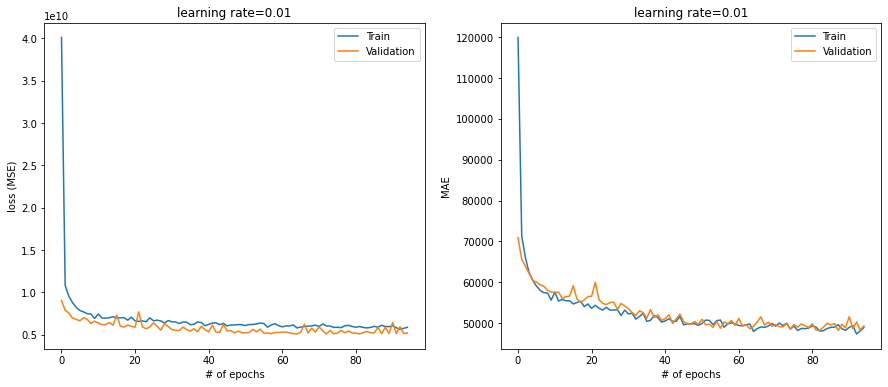

In [29]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

In [30]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

17/17 [==============================] - 0s 875us/step - loss: 5577205760.0000 - mae: 50377.3359


In [31]:
y_predict = model_regr.predict(x_test)

17/17 [==============================] - 0s 797us/step


In [32]:
r2_score(y_test, y_predict) 

0.9175373086383221

In [33]:
# show/hide code
a = y_test.values.reshape(-1,1).flatten()
b = y_predict.flatten()
diff = (b - a)

sim_data={"Actual Charges":a, 'Predicted Charges':b, 'Difference':np.round(diff,2)}

sim_data=pd.DataFrame(sim_data)

# Showing first 5 rows
sim_data.head(5)

,Actual Charges,Predicted Charges,Difference
0,249549,206694.015625,-42854.98
1,385894,381486.656250,-4407.34
2,26789,45152.796875,18363.80
3,58955,37307.972656,-21647.03
4,55827,116238.875000,60411.88


Text(0, 0.5, 'Predicted Charges')

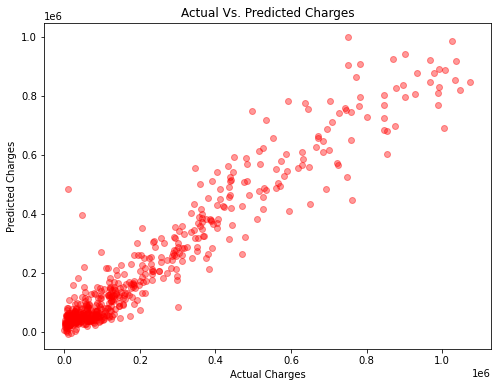

In [34]:
# visualization of actual vs. predicted charges
plt.figure(figsize=(8, 6)) 

plt.scatter(y_test, y_predict, alpha=0.4, color = 'red')
plt.title("Actual Vs. Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")